In [62]:
library(dplyr)
library(ggplot2)

In [65]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/"

In [66]:
prefixes = c("5mofa_factors_endo_eqtl_permuteE_within_donors/")

In [67]:
myfile = paste0(mydir, prefixes[1],"summary_endo_eqtl_all_perms.csv")
df = read.csv(myfile, row.names = 1)
head(df)

,gene,perm,pv_raw,snpID
0,ENSG00000133422_MORC2,perm83,0.29177711,22_31377027_A_G
1,ENSG00000133422_MORC2,perm83,0.31169648,22_31395825_T_C
2,ENSG00000184674_GSTT1,perm35,0.16220039,22_24295427_C_T
3,ENSG00000128294_TPST2,perm54,0.07667975,22_26980582_T_C
4,ENSG00000128294_TPST2,perm54,0.53030107,22_27020835_G_A
5,ENSG00000100344_PNPLA3,perm58,0.09659155,22_44323965_A_G


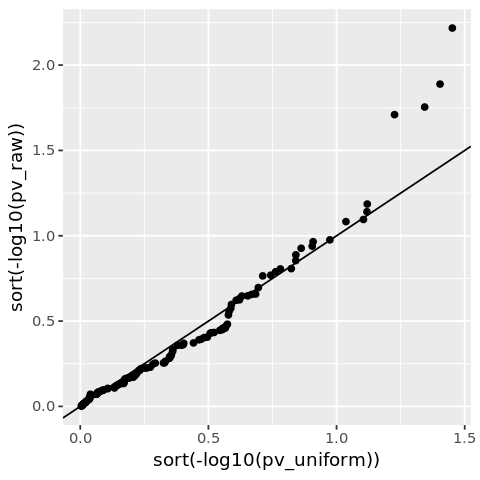

In [76]:
options(repr.plot.width = 4, repr.plot.height = 4)
df_perm = df[df$perm == "perm50",]
# head(df_perm)
df_perm$pv_uniform = runif(n = nrow(df_perm), min = 0, max = 1)
ggplot(df_perm, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + geom_point() + 
        geom_abline(slope = 1) #+ ylim(c(0,8))

In [53]:
df = df[order(df$pv_raw),]
# head(df)
df0 <- df[-which(duplicated(df$gene)),]
nrow(df0)
# df0

[1] 88

In [54]:
prefixes = c("5mofa_factors_endo_eqtl/")
# prefixes = c("1mofa_factor_endo_eqtl_gaussE_gaussY/")

In [55]:
myfile = paste0(mydir, prefixes[1],"summary_endo_eqtl.csv")
df = read.csv(myfile, row.names = 1)
head(df)

,gene,n_snps,pv_raw,snpID,pv,pv_adj
0,ENSG00000189306_RRP7A,3,8.298656e-12,22_42896474_T_C,2.489597e-11,0.99
1,ENSG00000189306_RRP7A,3,6.491640e-14,22_42897414_A_C,1.947492e-13,0.99
2,ENSG00000189306_RRP7A,3,5.606103e-18,22_42903671_T_G,1.681831e-17,0.99
3,ENSG00000196236_XPNPEP3,2,1.805718e-14,22_41256802_A_G,3.611436e-14,0.99
4,ENSG00000196236_XPNPEP3,2,1.076111e-04,22_41394128_C_T,2.152221e-04,0.99
5,ENSG00000185651_UBE2L3,1,1.960042e-04,22_22077719_C_T,1.960042e-04,0.99


In [56]:
df = df[order(df$pv_raw),]
# head(df)
df1 <- df[-which(duplicated(df$gene)),]
nrow(df1)
# df0

[1] 88

In [57]:
cols = c("gene","pv_raw")
df2 = inner_join(df0[,cols],df1[,cols], by = "gene", suffix = c(".perm",""))
head(df2)

gene,pv_raw.perm,pv_raw
ENSG00000184674_GSTT1,3.448477e-06,4.674111e-23
ENSG00000100162_CENPM,8.320913e-06,2.523242e-25
ENSG00000100376_FAM118A,1.627526e-05,5.117196e-12
ENSG00000211643_IGLV5-52,6.787416e-05,5.682581e-06
ENSG00000100410_PHF5A,9.653398e-05,3.775694e-07
ENSG00000100038_TOP3B,1.041529e-04,5.686287e-06


In [58]:
nrow(df2[df2$pv_raw < df2$pv_raw.perm,])/nrow(df2)

[1] 0.7727273